In [ ]:
__author__ = 'zeshi'
import tarfile
from datetime import date, timedelta
import gzip
import os
from gdal import GA_ReadOnly
import gdal
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, date_range

In [ ]:
def untargz_snodas(fn):
    tar_fn = fn
    folder_name = "SNODAS/"
    year_str = fn[14:18]
    month_str = fn[18:20]
    day_str = fn[20:22]
    date_str = year_str + month_str + day_str
    file = tarfile.open(tar_fn, "r:")
    dat_member_name = "./us_ssmv11034tS__T0001TTNATS" + date_str + "05HP001.dat.gz"
    hdr_member_name = "./us_ssmv11034tS__T0001TTNATS" + date_str + "05HP001.Hdr.gz"
    dat_member = file.getmember(dat_member_name)
    hdr_member = file.getmember(hdr_member_name)
    file.extract(dat_member, path=folder_name)
    file.extract(hdr_member, path=folder_name)
    dat_gz_fn = folder_name + dat_member_name
    hdr_gz_fn = folder_name + hdr_member_name
    dat_file = gzip.open(dat_gz_fn, "rb")
    dat_outF = open(dat_gz_fn[:-3], "wb")
    hdr_file = gzip.open(hdr_gz_fn, "rb")
    hdr_outF = open(hdr_gz_fn[:-3], "wb")
    dat_outF.write(dat_file.read())
    for i, line in enumerate(hdr_file):
        if i >= 0 and i <= 1:
            hdr_outF.write(line)
        if i >= 18 and i <= 57:
            hdr_outF.write(line)
    dat_file.close()
    dat_outF.close()
    hdr_file.close()
    hdr_outF.close()
    os.remove(dat_gz_fn)
    os.remove(hdr_gz_fn)

In [ ]:
def gen_snodas_fn(date):
    folder_name = "SNODAS/"
    return folder_name + "us_ssmv11034tS__T0001TTNATS" + str(date.year) + str(date.month).zfill(2) + str(date.day).zfill(2) + "05HP001.Hdr.gz"

In [ ]:
def untargz_all_snodas():
    fns = ["SNODAS/" + f for f in os.listdir("SNODAS/") if f.startswith('SNODAS')]
    for fn in fns:
        print fn
        untargz_snodas(fn)

In [ ]:
untargz_all_snodas()

In [ ]:
from rasterTools import rasterTools
date_list = {2014:{"Merced":[date(2014, 3, 24), 
                            date(2014, 4, 6), 
                             date(2014, 4, 14), 
                             date(2014, 4, 23), 
                             date(2014, 4, 29), 
                             date(2014, 5, 3), 
                             date(2014, 5, 12)], 
                  "Tuolumne": [date(2014, 3, 23), 
                             date(2014, 4, 7), 
                             date(2014, 4, 13), 
                             date(2014, 4, 20), 
                             date(2014, 4, 28), 
                             date(2014, 5, 2), 
                             date(2014, 5, 11)]},
             2016: {"Tuolumne": [date(2016, 4, 1), 
                                 date(2016, 4, 7),
                                 date(2016, 4, 16),
                                 date(2016, 4, 26),
                                 date(2016, 5, 27),
                                 date(2016, 6, 7), 
                                 date(2016, 6, 13),
                                 date(2016, 6, 20)]}}

In [ ]:
rt = rasterTools()
rt.reproject_snodas(date_list[2016]['Tuolumne'], 'Tuolumne')

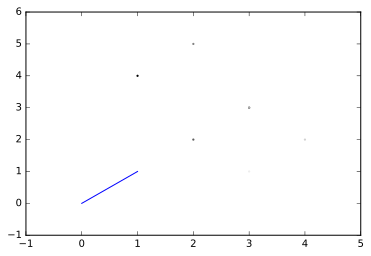

In [46]:
plt.scatter(np.array([1,3,2,2,3,4,3,2]),np.array([4,3,2,5,3,2,1,3]), c=np.arange(1,9)/10., edgecolor='none', cmap='Greys_r',s=5)
plt.plot([0, 1], [0, 1])